In [0]:
timport pandas as pd 
%matplotlib inline
url = 'WR.csv'
url1= 'COF.csv'
url2= 'WR_DATA.csv'
url3= 'COF_DATA.csv'
url4= 'Combined.csv'
url5= 'COF_1.csv'

col_names = ['kurtosis' ,'Mean', 'Skew' ,'standard_DEV' ,'Variance' ,'RMS' ,'peak2peak' ,'peak2rms' ,'Sum' ,'load' ,'speed']
pima = pd.read_csv(url, header=None, names=col_names)
col_names_1 = ['kurtosis_x' , 'Mean_x' , 'Skew_x' , 'standard_DEV_x' , 'Variance_x' , 'RMS_x' ,'peak2peak_x' , 'peak2rms_x' , 'Sum_x' , 'load' , 'speed' , 'kurtosis_y' , 'Mean_y' , 'Skew_y' , 'standard_DEV_y' , 'Variance_y' , 'RMS_y' , 'peak2peak_y' , 'peak2rms_y' , 'Sum_y'
]
L5='SAVE_cluster.csv'
cols_name_l5=['load','speed','cluster']
dof=pd.read_csv(url1, header=None, names=col_names)
final=pd.read_csv(url2, header=None, names=col_names)
final_cof=pd.read_csv(url3, header=None, names=col_names)
cof_to_merge=pd.read_csv(url4, header=None, names=col_names_1)
graph=pd.read_csv(L5, header=None, names=cols_name_l5)
graph_123=pd.read_csv(url5, header=None, names=cols_name_l5)

In [0]:
##choosing the columns for clustering

#for WR
chosen_col=pima[['load' ,'speed']] #not - interpolated
ch_final=final[['load' ,'speed']] #interpolated

graph_combine=graph[['load' ,'speed']]

#for COF
chosen_col_cof=dof[['load' ,'speed']] # not interpolated
ch_final_cof=final_cof[['load' ,'speed']] # interpolated

In [0]:
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

In [0]:
import numpy as np
frames = pd.merge(final, final_cof, on=['load','speed'], how='right')
frames.to_csv('WR_SAVE.csv')
#result = pd.concat(frames)
print graph.head(9500)

      load   speed  cluster
0      2.0  400.00        3
1      2.0  402.02        3
2      2.0  404.04        3
3      2.0  406.06        3
4      2.0  408.08        3
5      2.0  410.10        3
6      2.0  412.12        3
7      2.0  414.14        3
8      2.0  416.16        3
9      2.0  418.18        3
10     2.0  420.20        3
11     2.0  422.22        3
12     2.0  424.24        3
13     2.0  426.26        3
14     2.0  428.28        3
15     2.0  430.30        3
16     2.0  432.32        3
17     2.0  434.34        3
18     2.0  436.36        3
19     2.0  438.38        3
20     2.0  440.40        1
21     2.0  442.42        1
22     2.0  444.44        1
23     2.0  446.46        1
24     2.0  448.48        1
25     2.0  450.51        1
26     2.0  452.53        1
27     2.0  454.55        1
28     2.0  456.57        1
29     2.0  458.59        1
...    ...     ...      ...
9470   4.0  541.41        0
9471   4.0  543.43        0
9472   4.0  545.45        0
9473   4.0  547.47  

In [0]:
# K - Means Clustering for WR

In [0]:
from sklearn.cluster import KMeans

#only for 2 params - l and s
K_M = KMeans(n_clusters=5, init='k-means++', n_init=10)
K_M.fit(dof)
K_Mean = KMeans(n_clusters=4, init='k-means++', n_init=100)
K_Mean.fit(final_cof)

# for 9+2 params
km = KMeans(n_clusters=5, init='k-means++', n_init=10)
#K_M = KMeans(n_clusters=3, init='k-means++', n_init=10)
km.fit(pima)
k_m = KMeans(n_clusters=4,init='k-means++', n_init=80)
#K_M = KMeans(n_clusters=3, init='k-means++', n_init=10)
k_m.fit(final)

k_m_final = KMeans(n_clusters=4,init='k-means++', n_init=3000)
#K_M = KMeans(n_clusters=3, init='k-means++', n_init=10)
k_m_final.fit(cof_to_merge)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=3000, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
x=K_M.fit_predict(dof)
X=K_Mean.fit_predict(final_cof)

y=km.fit_predict(pima)
Y=k_m.fit_predict(final)

Z=k_m_final.fit_predict(cof_to_merge)
L5=cof_to_merge[['load' ,'speed']]
L5["Cluster"] = Z
L5.to_csv('SAVE_cluster.csv')
print L5["Cluster"]
L1=dof[['load' ,'speed']]
L1["Cluster"] = x
L2=final_cof[['load' ,'speed']]
L2["Cluster"] = X

L3=pima[['load' ,'speed']]
L3["Cluster"] = y
L4=final[['load' ,'speed']]
L4["Cluster"] = Y


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
9470    0
9471    0
9472    0
9473    0
9474    0
9475    0
9476    0
9477    0
9478    0
9479    0
9480    0
9481    0
9482    0
9483    0
9484    0
9485    0
9486    0
9487    0
9488    0
9489    3
9490    3
9491    3
9492    3
9493    3
9494    3
9495    3
9496    3
9497    3
9498    3
9499    3
Name: Cluster, Length: 9500, dtype: int32


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


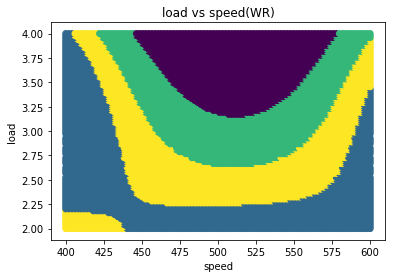

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x=graph["speed"], y=graph["load"], c=graph["cluster"])
plt.title('load vs speed(WR)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()


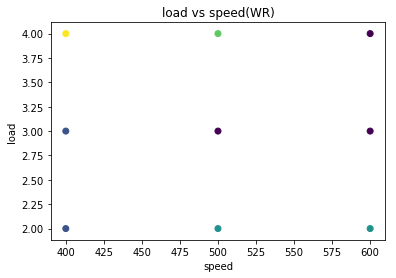

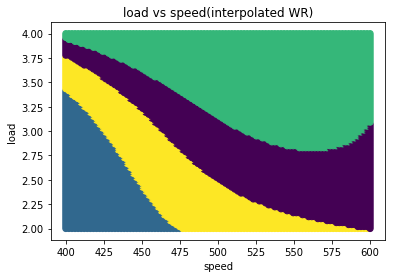

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x=L1["speed"], y=L1["load"], c=L1["Cluster"])
plt.title('load vs speed(WR)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()
plt.scatter(x=L2["speed"], y=L2["load"], c=L2["Cluster"])
plt.title('load vs speed(interpolated WR)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()

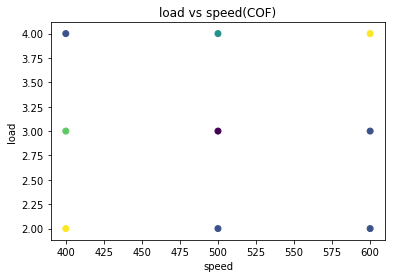

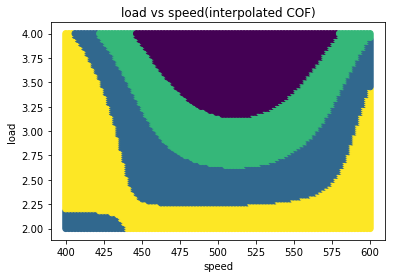

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x=L3["speed"], y=L3["load"], c=L3["Cluster"])
plt.title('load vs speed(COF)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()
L4.to_csv('COF.csv')
plt.scatter(x=L4["speed"], y=L4["load"], c=L4["Cluster"])
plt.title('load vs speed(interpolated COF)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()

('k: ', 1)
('k: ', 2)
('k: ', 3)
('k: ', 4)
('k: ', 5)
('k: ', 6)
('k: ', 7)
('k: ', 8)
('k: ', 9)


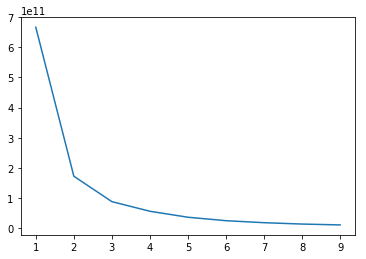

In [0]:
elbow_plot(cof_to_merge, maxK=10)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
score_2=0
score_3=0
for i_123 in range(1,30):
    
    print "k: \n",i_123
    
    Y=k_m.fit_predict(final)
    averageSilhouette = silhouette_score(final, Y, metric='euclidean')
    if averageSilhouette >= score_2:
        score_2 = averageSilhouette
        print 'n_clusters:', i_123, "Average Silhouette: ", averageSilhouette 
    print "================================================="


k: 
1
n_clusters: 1 Average Silhouette:  0.524212152819489
k: 
2
k: 
3
k: 
4
k: 
5
k: 
6
k: 
7
k: 
8
k: 
9
k: 
10
k: 
11
k: 
12
k: 
13
k: 
14
k: 
15
k: 
16
k: 
17
k: 
18
k: 
19
k: 
20
k: 
21
k: 
22
k: 
23
k: 
24
k: 
25
k: 
26
k: 
27
k: 
28
k: 
29


In [0]:
#x
#data for WR
#ch_final = [['load' ,'speed']]
#y
#label for WR
tragetz = L4[['Cluster']]

#x
#data for WR
#chosen_col
#y
#label for WR
tragetz_chosen_col = L2[['Cluster']]

#x cof
#ch_final_cof
#y cof
targetz_cof = L3[['Cluster']]

#x cof
#chosen_col_cof=df[['load' ,'speed']] # not interpolated
#y cof
targetz_cof_1 = L1[['Cluster']]



graph_combine_target=graph['cluster']

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(ch_final, tragetz, test_size=0.4, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(graph_combine, graph_combine_target, test_size=0.4, random_state=4)


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# train the model on the training set
d_clf = DecisionTreeClassifier(criterion = "gini", random_state = 1000,
                               max_depth=4, min_samples_leaf=5)
d_clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = d_clf.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))

ValueError: could not convert string to float: speed

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(d_clf, graph_combine, graph_combine_target, cv=10, scoring='accuracy')
print(scores)

/home/nishu/kerai/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


ValueError: could not convert string to float: speed

In [0]:
print(scores.mean())

In [0]:
# import the class
from sklearn.ensemble import RandomForestClassifier

# instantiate the model (using the default parameters)
clf = RandomForestClassifier()

# fit the model with data
clf.fit(X_train, y_train)

In [0]:
y_pred = clf.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))

In [0]:
# train the model on the training set
clf = RandomForestClassifier(n_estimators=5000, min_samples_leaf=5, max_depth=4)
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

In [0]:
scores = cross_val_score(d_clf, graph_combine, graph_combine_target, cv=10, scoring='accuracy')
print(scores)

In [0]:
print(scores.mean())

In [0]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=1000))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [0]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()